# XGBM & LGBM

## XGBM : Extreme Gradient Boosting
- Dataset is small or medium
- You want stable & reliable results
- Overfitting control is important
- Accurate but slower, level-wise tree growth
## LGBM : Light Gradient Boosting
- Dataset is large
- Many features
- Speed is important
- Faster and memory-efficient, leaf-wise growth

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data set

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Observed multiple Zeros in features
# How many are zeros for each feature to check

zero = (data == 0).sum()
Zeros = pd.DataFrame({'column':zero.index,'Zeros_count':zero.values})
Zeros

,column,Zeros_count
0,Pregnancies,111
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0
8,Outcome,500


In [7]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    data[col] = data[col].replace(0, data[col].median())
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [8]:
# checking duplicates

data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


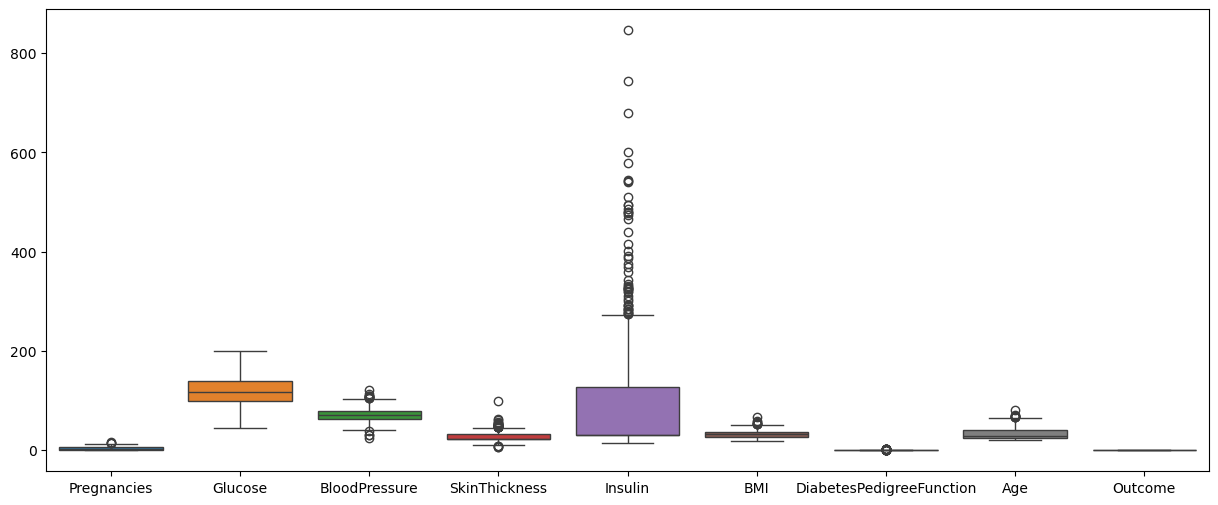

In [10]:
# checking Outliers
plt.figure(figsize=(15,6))
sns.boxplot(data)
plt.show()

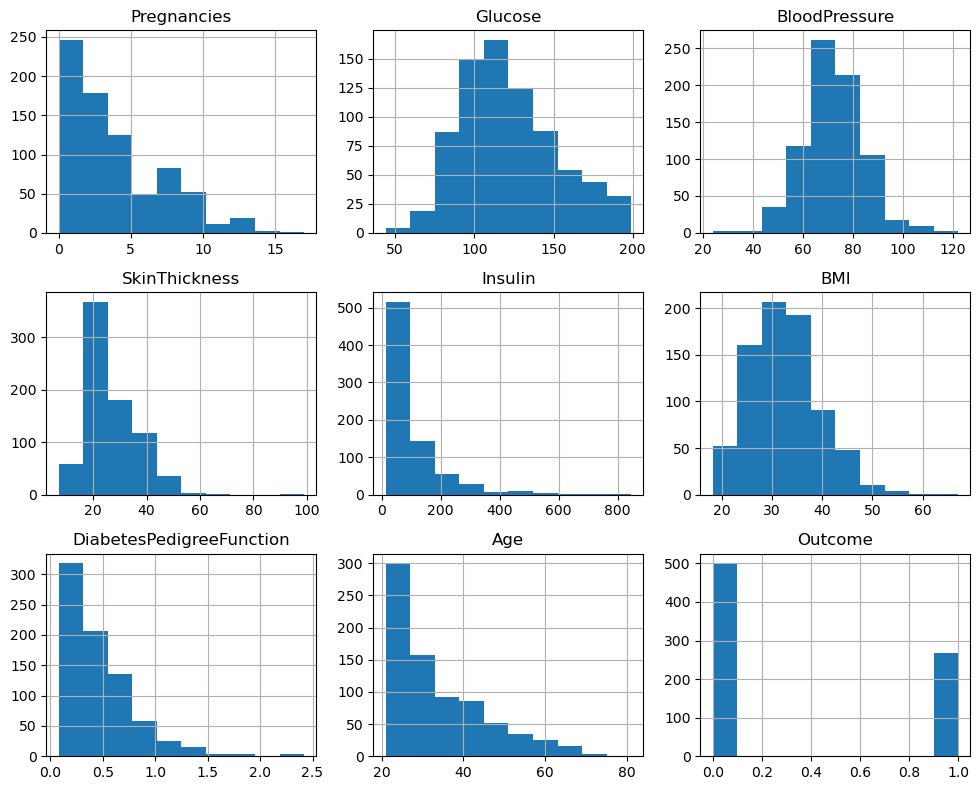

In [11]:
## distribution of data

data.hist(bins=10, figsize=(10,8))
plt.tight_layout()
plt.show()

In [12]:
# check correlation

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


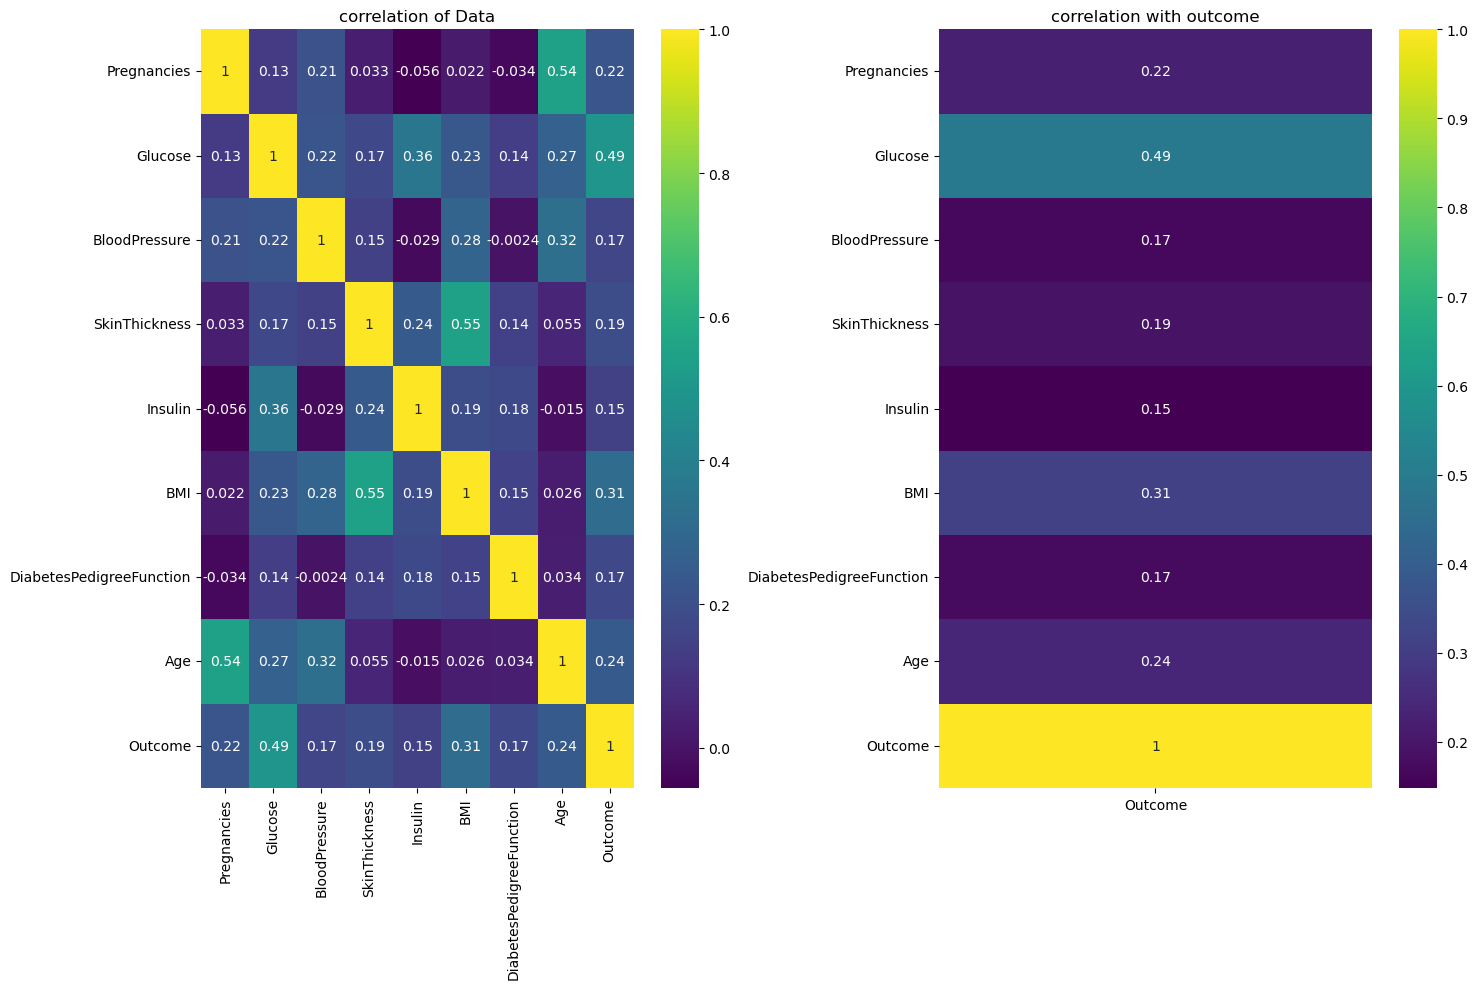

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('correlation of Data')

plt.subplot(1,2,2)
sns.heatmap(data.corr()[['Outcome']], annot=True, cmap='viridis')
plt.title('correlation with outcome')
plt.tight_layout()
plt.show()

#### # Separate feature (X) and Target (y)

In [14]:

X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [17]:
# using stratify because data is imbalnced
# stratify = y [It keeps class distribution same in train & test sets.]

print(y.value_counts())
print(y.value_counts(normalize=True))

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


### train and split the data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## LightGBM Model fitting

In [19]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

####  Data Validation 

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
def eval_metrics(y, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    acc_score = accuracy_score(y, y_pred)
    prec_score = precision_score(y, y_pred)
    recal_score = recall_score(y, y_pred)
    f1_score = f1_score(y, y_pred)
    
    print('Accuracy Score =', acc_score)
    print('Precision Score =', prec_score)
    print('Recall Score =', recal_score)
    print('F1 Score =', f1_score)


In [22]:
y_pred_train_lgbm = lgbm.predict(X_train)
y_pred_test_lgbm = lgbm.predict(X_test)

In [23]:
print('Training Score :')
eval_metrics(y_train, y_pred_train_lgbm)
print('-'*50)
print('Testing Score :')
eval_metrics(y_test, y_pred_test_lgbm)

Training Score :
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
F1 Score = 1.0
--------------------------------------------------
Testing Score :
Accuracy Score = 0.7272727272727273
Precision Score = 0.6153846153846154
Recall Score = 0.5925925925925926
F1 Score = 0.6037735849056604


### XGBoost Model Fitting

In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [25]:
y_pred_train_xgbm = lgbm.predict(X_train)
y_pred_test_xgbm = lgbm.predict(X_test)

In [26]:
print('Training Score :')
eval_metrics(y_train, y_pred_train_xgbm)
print('-'*50)
print('Testing Score :')
eval_metrics(y_test, y_pred_test_xgbm)

Training Score :
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
F1 Score = 1.0
--------------------------------------------------
Testing Score :
Accuracy Score = 0.7272727272727273
Precision Score = 0.6153846153846154
Recall Score = 0.5925925925925926
F1 Score = 0.6037735849056604


### To find Best_Estimators & HyperParameters Tuning

#### Best LightGBM using GridSearchCV
##### Key_Parameters
- n_estimators 
- learning_rate
- max_depth
- subsample

In [27]:
from sklearn.model_selection import GridSearchCV

lgbm_param = {'n_estimators': [200,300,400],
              'learning_rate': [0.01, 0.05,0.1],
              'max_depth': [2, 3, 5],
             'subsample': [0.6, 0.7]}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42, class_weight='balanced'),
                        param_grid=lgbm_param,
                        cv=5,
                        scoring='f1',
                        n_jobs=-1,
                        verbose=1)

lgbm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [200, 300, 400],
                         'subsample': [0.6, 0.7]},
             scoring='f1', verbose=1)

In [28]:
print("Best parameters:", lgbm_grid.best_params_)
print("Best accuracy:", lgbm_grid.best_score_)

best_model_lgbm = lgbm_grid.best_estimator_
print(best_model_lgbm)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best accuracy: 0.6874342965256278
LGBMClassifier(class_weight='balanced', learning_rate=0.01, max_depth=3,
               n_estimators=300, random_state=42, subsample=0.6)


#### Validation

#### Train Data

In [29]:
y_pred_train_lgbm_hyp = best_model_lgbm.predict(X_train)
y_pred_test_lgbm_hyp = best_model_lgbm.predict(X_test)
y_pred_train_lgbm_hyp_proba = best_model_lgbm.predict_proba(X_train)[:,1]
y_pred_test_lgbm_hyp_proba = best_model_lgbm.predict_proba(X_test)[:,1]


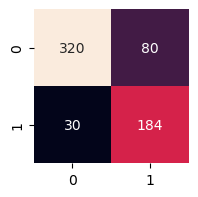

Accuracy Score = 0.8208469055374593
Precision Score = 0.696969696969697
Recall Score = 0.8598130841121495
F1 Score = 0.7698744769874477
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       400
           1       0.70      0.86      0.77       214

    accuracy                           0.82       614
   macro avg       0.81      0.83      0.81       614
weighted avg       0.84      0.82      0.82       614

Accuracy Score (Train): 0.9098714953271028
Log_loss for Training data : 0.4093271893545411


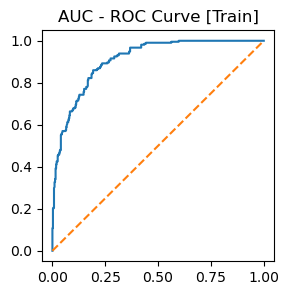

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import log_loss

CM = confusion_matrix(y_train, y_pred_train_lgbm_hyp)
plt.figure(figsize=(2,2))
sns.heatmap(CM, annot=True, cbar=False, fmt='d')
plt.show()

# Confusion Matrix
eval_metrics(y_train, y_pred_train_lgbm_hyp)
print(classification_report(y_train, y_pred_train_lgbm_hyp))
AUC_Score = roc_auc_score(y_train, y_pred_train_lgbm_hyp_proba)
print('Accuracy Score (Train):',AUC_Score)
Loss_train = log_loss(y_train,y_pred_train_lgbm_hyp_proba)
print('Log_loss for Training data :',Loss_train)

# AUC_ROC
plt.figure(figsize=(3,3))
plt.title('AUC - ROC Curve [Train]')
plt.xlabel = 'False Positive Rate (FPR)'
plt.ylabel = 'True Positive Rate (TPR)'

fpr,tpr,thresh = roc_curve(y_train,y_pred_train_lgbm_hyp_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()

#### Test Data

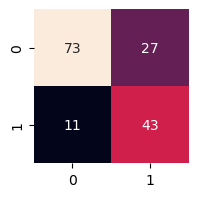

Accuracy Score = 0.7532467532467533
Precision Score = 0.6142857142857143
Recall Score = 0.7962962962962963
F1 Score = 0.6935483870967742
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       100
           1       0.61      0.80      0.69        54

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.76       154

Accuracy Score (Test): 0.815
Log_loss for Training data : 0.517399945927225


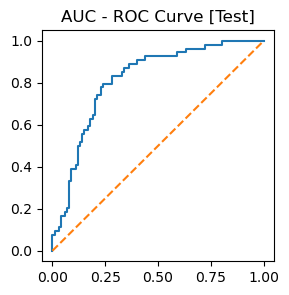

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import log_loss

CM = confusion_matrix(y_test, y_pred_test_lgbm_hyp)
plt.figure(figsize=(2,2))
sns.heatmap(CM, annot=True, cbar=False, fmt='d')
plt.show()

# Confusion Matrix
eval_metrics(y_test, y_pred_test_lgbm_hyp)
print(classification_report(y_test, y_pred_test_lgbm_hyp))
AUC_Score = roc_auc_score(y_test, y_pred_test_lgbm_hyp_proba)
print('Accuracy Score (Test):',AUC_Score)
Loss_train = log_loss(y_test,y_pred_test_lgbm_hyp_proba)
print('Log_loss for Training data :',Loss_train)

# AUC_ROC
plt.figure(figsize=(3,3))
plt.title('AUC - ROC Curve [Test]')
plt.xlabel = 'False Positive Rate (FPR)'
plt.ylabel = 'True Positive Rate (TPR)'

fpr,tpr,thresh = roc_curve(y_test,y_pred_test_lgbm_hyp_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()

#### Best XGBoost using GridSearchCV
##### Key_Parameters
- n_estimators 
- learning_rate
- max_depth
- eval_metrics

In [32]:
xgbm_params = {'n_estimators': [100,200,300],
              'learning_rate': [0.01, 0.05, 0.1],
              'max_depth': [2,3,4],
              'subsample': [0.7, 0.8,0.9]}

xgbm_grid = GridSearchCV(XGBClassifier(random_state=42,eval_metric='logloss'),
                         param_grid=xgbm_params,
                         cv=5,
                         scoring='f1',
                         n_jobs=-1,
                        verbose=1)

xgbm_grid.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='f1', verbose=1)

In [33]:
print("Best parameters:", xgbm_grid.best_params_)
print("Best accuracy:", xgbm_grid.best_score_)

best_model_xgbm = xgbm_grid.best_estimator_
print(best_model_xgbm)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Best accuracy: 0.6472240802675586
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)


#### Validation

In [34]:
y_pred_train_xgbm_hyp = best_model_xgbm.predict(X_train)
y_pred_test_xgbm_hyp = best_model_xgbm.predict(X_test)

y_pred_train_xgbm_hyp_proba = best_model_xgbm.predict_proba(X_train)[:,1]
y_pred_test_xgbm_hyp_proba = best_model_xgbm.predict_proba(X_test)[:,1]


#### Train

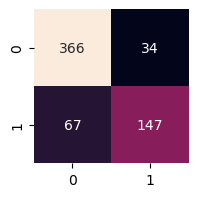

Accuracy Score = 0.8355048859934854
Precision Score = 0.8121546961325967
Recall Score = 0.6869158878504673
F1 Score = 0.7443037974683544
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       400
           1       0.81      0.69      0.74       214

    accuracy                           0.84       614
   macro avg       0.83      0.80      0.81       614
weighted avg       0.83      0.84      0.83       614

Accuracy Score (Train): 0.9154848130841121
Log_loss for Training data : 0.37951640791142055


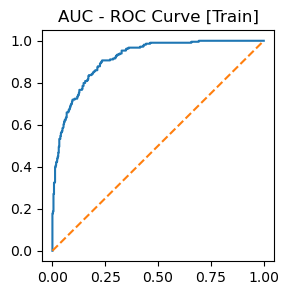

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import log_loss

CM = confusion_matrix(y_train, y_pred_train_xgbm_hyp)
plt.figure(figsize=(2,2))
sns.heatmap(CM, annot=True, cbar=False, fmt='d')
plt.show()

# Confusion Matrix
eval_metrics(y_train, y_pred_train_xgbm_hyp)
print(classification_report(y_train, y_pred_train_xgbm_hyp))
AUC_Score = roc_auc_score(y_train, y_pred_train_xgbm_hyp_proba)
print('Accuracy Score (Train):',AUC_Score)
Loss_train = log_loss(y_train,y_pred_train_xgbm_hyp_proba)
print('Log_loss for Training data :',Loss_train)

# AUC_ROC
plt.figure(figsize=(3,3))
plt.title('AUC - ROC Curve [Train]')
plt.xlabel = 'False Positive Rate (FPR)'
plt.ylabel = 'True Positive Rate (TPR)'

fpr,tpr,thresh = roc_curve(y_train,y_pred_train_xgbm_hyp_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()

#### Test

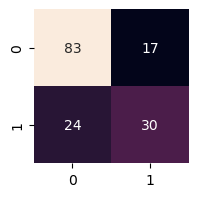

Accuracy Score = 0.8355048859934854
Precision Score = 0.8121546961325967
Recall Score = 0.6869158878504673
F1 Score = 0.7443037974683544
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154

Accuracy Score (Test): 0.8229629629629629
Log_loss for Training data : 0.4925173210571687


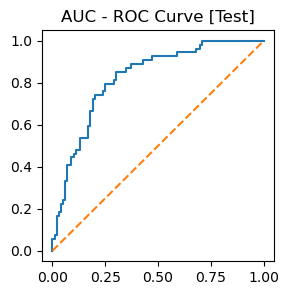

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import log_loss

CM = confusion_matrix(y_test, y_pred_test_xgbm_hyp)
plt.figure(figsize=(2,2))
sns.heatmap(CM, annot=True, cbar=False, fmt='d')
plt.show()

# Confusion Matrix
eval_metrics(y_train, y_pred_train_xgbm_hyp)
print(classification_report(y_test, y_pred_test_xgbm_hyp))
AUC_Score = roc_auc_score(y_test, y_pred_test_xgbm_hyp_proba)
print('Accuracy Score (Test):',AUC_Score)
Loss_train = log_loss(y_test,y_pred_test_xgbm_hyp_proba)
print('Log_loss for Training data :',Loss_train)

# AUC_ROC
plt.figure(figsize=(3,3))
plt.title('AUC - ROC Curve [Test]')
plt.xlabel = 'False Positive Rate (FPR)'
plt.ylabel = 'True Positive Rate (TPR)'

fpr,tpr,thresh = roc_curve(y_test,y_pred_test_xgbm_hyp_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()

### Final Validation with Both Models

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def get_metrics(y, y_pred):
    return {
        "Accuracy": round(accuracy_score(y, y_pred), 3),
        "Precision": round(precision_score(y, y_pred), 3),
        "Recall": round(recall_score(y, y_pred), 3),
        "F1 Score": round(f1_score(y, y_pred), 3)}

In [38]:
Train_results = pd.DataFrame.from_dict({'LGBM_Base':get_metrics(y_train, y_pred_train_lgbm),
                             'LGBM_hyp':get_metrics(y_train, y_pred_train_lgbm),
                             'XGBM_Base':get_metrics(y_train, y_pred_train_xgbm),
                             "XGBM_hyp":get_metrics(y_train, y_pred_train_lgbm_hyp)}).T



Test_results = pd.DataFrame.from_dict({'LGBM_Base':get_metrics(y_test, y_pred_test_lgbm),
                             'LGBM_hyp':get_metrics(y_test, y_pred_test_lgbm_hyp),
                             'XGBM_Base':get_metrics(y_test, y_pred_test_xgbm),
                             "XGBM_hyp":get_metrics(y_test, y_pred_test_lgbm_hyp)}).T
print('Comparing Both Results')
print('Train Results:')
print(Train_results)
print('Test Results:')
print(Test_results)

Comparing Both Results
Train Results:
           Accuracy  Precision  Recall  F1 Score
LGBM_Base     1.000      1.000    1.00      1.00
LGBM_hyp      1.000      1.000    1.00      1.00
XGBM_Base     1.000      1.000    1.00      1.00
XGBM_hyp      0.821      0.697    0.86      0.77
Test Results:
           Accuracy  Precision  Recall  F1 Score
LGBM_Base     0.727      0.615   0.593     0.604
LGBM_hyp      0.753      0.614   0.796     0.694
XGBM_Base     0.727      0.615   0.593     0.604
XGBM_hyp      0.753      0.614   0.796     0.694


- As per my understnding XGBM_hyp is good model
- XGBM_hyp is better because it generalizes better, even though test metrics are identical.
- Did not achieve perfect training score
- Learned general patterns, not noise
- Smaller train–test gap
- More stable for real-world data
